In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from multiprocessing import Process, Queue, Pool
import emcee
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import warnings
import sys
warnings.filterwarnings("ignore")

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rc('font', size=24)

In [2]:
#Helper function for our escape library
def cosmology(cosmology):
    case = cosmology.name
    if case == 'Flatw0waCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.wa, cosmology.h]
    
    elif case == 'FlatwCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.h]

    elif case == 'wCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.w0,cosmology.h]
        
    elif case == 'LambdaCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.h]

    elif case == 'FlatLambdaCDM':
        return [cosmology.Om0, cosmology.h]


In [3]:
#please rename these for your file paths
path_to_function_libraries = "/nfs/turbo/lsa-christoq/Christoq1/alexcrod/Escape_Library/Function_Libraries/"
path_to_galaxy_data = "/nfs/turbo/lsa-christoq/Christoq1/alexcrod/Escape_Analysis/Data/"
path_to_Zv_calibration='/gpfs/accounts/christoq_root/christoq1/alexcrod/Many_Clusters_Data/Millenium/Untitled Folder/Cleaned Funcs/Updated/Untitled Folder/Updated/Data/AGAMA_Zv_calibration'

if path_to_function_libraries not in sys.path:
    sys.path.insert(0, path_to_function_libraries)
    
from escape_theory_functions import dehnen_nfwM200_errors, rho_crit_z
from escape_analysis_functions import main

Omega_m = 0.3
Omega_L = 1-Omega_m
h0 = 0.7

cosmo_name = 'FlatLambdaCDM'
cosmo = FlatLambdaCDM(H0=h0*100.0,Om0=Omega_m,name = cosmo_name)
cosmo_params = cosmology(cosmo)

In [6]:
galaxy_positional_data = np.genfromtxt(os.path.join(path_to_galaxy_data, 'Rines_galaxy_data.txt'))

# For Cluster A7
cluster_positional_data = (2.93854167, 32.41569444, 0.106)
M200, M200_err_up, M200_err_down = [10**14.64345268,  0.15588787,  0.24551267]


100%|██████████| 2000/2000 [04:58<00:00,  6.70it/s]


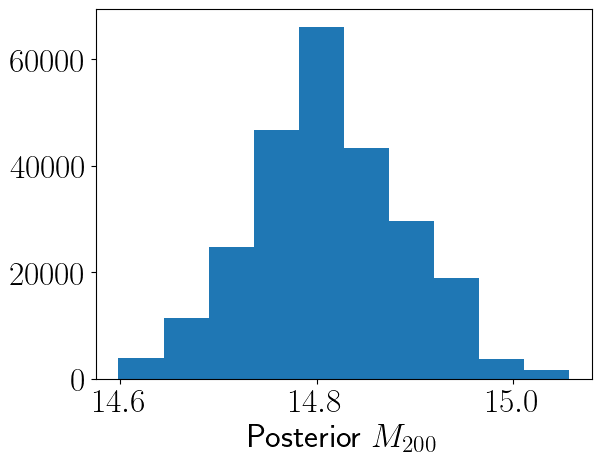

Escape Velocity Mass Estimate: 14.81 + 0.08 - 0.07


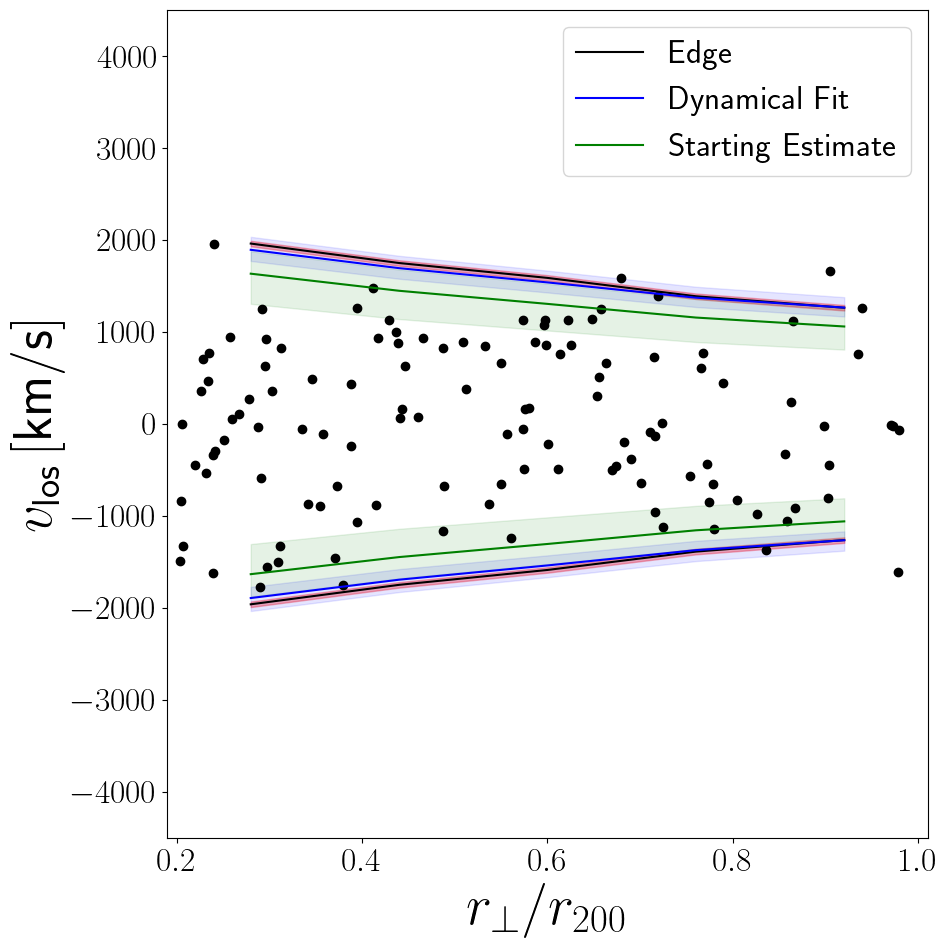

In [8]:
main(path_to_Zv_calibration,galaxy_positional_data,cluster_positional_data,M200,M200_err_up,M200_err_down,cosmo_params,cosmo_name)